# Assignment 1. Understanding the K-Means Clustering

Explain the works of K-Means Clustering !

Answer:





---

---



---













---



Download [pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jX_rLPfcCfzEEgy9xaoALmpqfU2s5TTB)

In [1]:
import pandas as pd

df = pd.read_csv('pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0


# Assignment 2. Data Clustering by using K-Means Clustering

In this assignment, we will penform clustering between 'Umur' and 'Skor Belanka(1-100)'. However, the clustering can't be penformed due to the outliers and missing values occurence in the data. So, you may follow these steps :

*   Handling the missing values by using method ='ffill'
*   Handling the outliers by using the Interquartile Range method
*   Penform a data rescalling by using StandardScaler
*   Do the clustering using kmeans clustering with k =2, and visualize it 
*   Use the elbow method to determine the right amount of cluster (k)
*   Use k=3 (Elbow Method Recommendation), and then visualize it
*   Calculate the Silhoutte Coefficient from those two clustering results










In [2]:
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [3]:
df.fillna(method='ffill', inplace=True)

In [4]:
import numpy as np

def get_lower_upper_bound(x):
  q1 = np.percentile(x,25)
  q3 = np.percentile(x,75)
  iqr = q3 - q1
  lower_bound = q1 - (iqr*1.5)
  upper_bound = q3 + (iqr*1.5)
  return lower_bound, upper_bound

def get_outliers_iqr(x):
  lower_bound, upper_bound = get_lower_upper_bound(x)
  return x[np.where((x > upper_bound) | (x < lower_bound))]

In [5]:
print(get_outliers_iqr(df['Umur'].values))
print(get_outliers_iqr(df['Skor Belanja (1-100)'].values))

[120.]
[150.]


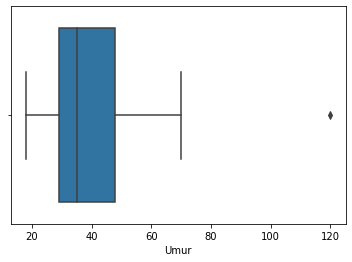

In [6]:
import seaborn as sns
sns.boxplot(x='Umur', data=df)

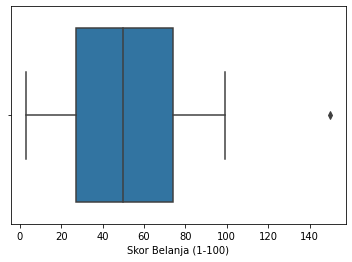

In [7]:
sns.boxplot(x='Skor Belanja (1-100)', data=df)

In [8]:
def remove_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_final = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR)))]
  return df_final

In [9]:
df_outlier_removed = remove_outlier_IQR(df[['Umur','Skor Belanja (1-100)']])
df_outlier_removed.dropna(axis=0, inplace=True)

In [10]:
df_outlier_removed.head()

,Umur,Skor Belanja (1-100)
0,19.0,39.0
1,21.0,81.0
2,20.0,6.0
3,23.0,77.0
4,31.0,40.0


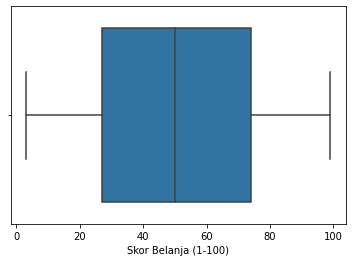

In [11]:
sns.boxplot(x='Skor Belanja (1-100)', data=df_outlier_removed)

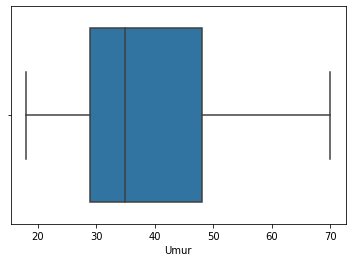

In [12]:
sns.boxplot(x='Umur', data=df_outlier_removed)

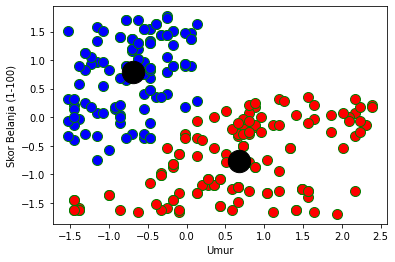

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Feature Scalling
sc = StandardScaler()
df_outlier_std = sc.fit_transform(df_outlier_removed.astype(float))

## Clustering with KMeans

kmeans1 = KMeans(n_clusters=2, random_state=42).fit(df_outlier_std)
labels1 = kmeans1.labels_

new_df_outlier_std = pd.DataFrame(data = df_outlier_std, columns = ['Umur','Skor Belanja (1-100)'])
new_df_outlier_std['label_kmeans1'] = labels1

plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans1 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans1 == 1], c='red', s=100, edgecolor='green', linestyle='-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


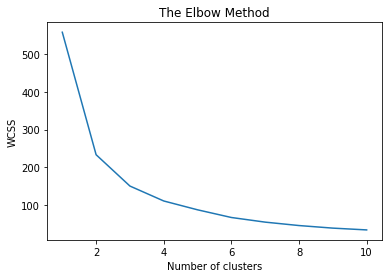

In [14]:
wcss =[]
for i in range(1, 11) :
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(new_df_outlier_std)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state = 42).fit(df_outlier_std)

kmeans2.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2], dtype=int32)

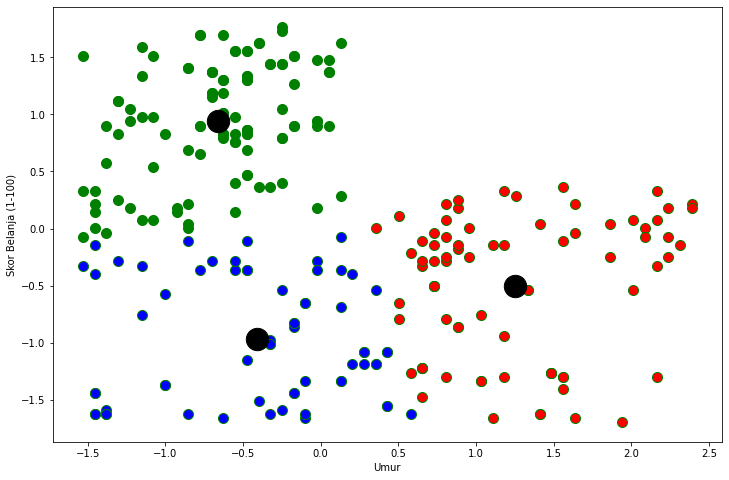

In [16]:
labels2 = kmeans2.labels_

new_df_outlier_std['label_kmeans2'] = labels2

plt.figure(figsize=(12,8))
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 0], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 1], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 2], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 2], c='green', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_df_outlier_std.Umur[new_df_outlier_std.label_kmeans2 == 3], new_df_outlier_std['Skor Belanja (1-100)'][new_df_outlier_std.label_kmeans2 == 3], c='yellow', s=100, edgecolor='green', linestyle='-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=500);
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

print(silhouette_score(new_df_outlier_std, labels=labels1))
print(silhouette_score(new_df_outlier_std, labels=labels2))

0.5245622611810248
0.5816811722567546


Expected output:

n_cluster =2

![](https://drive.google.com/uc?id=1RHedPeGR48w-cWl7WWkIsHTSB2DRgynO)


Elbow graph

![](https://drive.google.com/uc?id=1S3_uvQWzJCi8YwSBbpu2imKbUBZ3JdmV)

n_cluster =3

![](https://drive.google.com/uc?id=1EVMDQgPpC8vYpfxilyiJMRDNIr-JXULd)

In [19]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.61200,64.736000,50.244000
std,72.312977,14.21145,25.112324,28.455286
min,1.000000,18.00000,15.000000,3.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,35.00000,70.000000,50.000000
75%,187.750000,48.00000,78.750000,74.000000
max,250.000000,120.00000,137.000000,150.000000




---



---



---



# Assignment 3. Analyze the Clustering Result Data

From the clustering result above, make a customer segmentation analysis for the progress of the supermarket.

Answer :


Based of the clustering result, we may conclude that there are 3 type of costumers:


1.   Relatively younger costumers that give relatively high scores
2.   Relatively younger costumers that give relatively low scores
3.   Relatively older costumers that give relatively low scores

We may also conclude that the older costumers have a tendency to give low scores. Maybe it can be used as insight that the company needed to enchance the product (like the User Experience or etc.)


P.S.

We can used this below code to determine the best k clusters, based on the sillhoutte analysis.

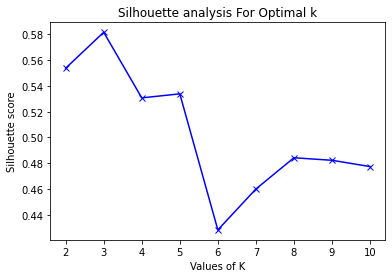

In [24]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans_sh = KMeans(n_clusters=num_clusters)
 kmeans_sh.fit(new_df_outlier_std)
 cluster_labels = kmeans_sh.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(new_df_outlier_std, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,"bx-")

plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()